# Analysis 4 : 
## Mean Global Temps & Min, Max & Mean Yearly Temps for Random Cities

In [37]:
#do all the imports
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
#use parse_dates to explicitly state that dt is a date series
global_temp = pd.read_csv('GlobalTemperatures.csv', parse_dates=['dt'])
global_temp.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [6]:
global_temp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


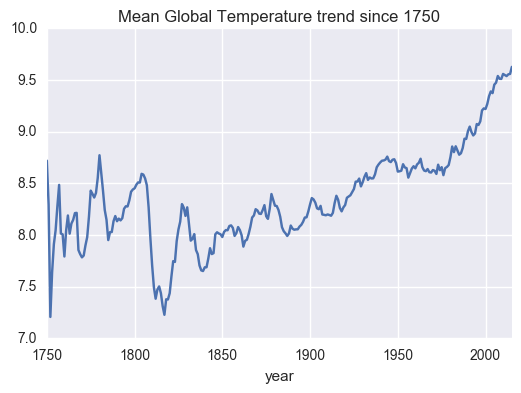

In [38]:
#mean avg temperature changes over the years
year_temp = global_temp.groupby(global_temp.dt.dt.year).mean()
#exponentially weighted moving average : ewma
pd.stats.moments.ewma(year_temp.LandAverageTemperature, 3).plot()
plt.title('Mean Global Temperature trend since 1750')
plt.xlabel('year')
#save the plot as a pdf file
plt.savefig("./ana_4/meanglobaltemps.png", bbox_inches='tight')

In [14]:
cities = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv', parse_dates=['dt'])
#there are some cities with the same name but in different countries 
cities[['City', 'Country']].drop_duplicates()
cities.City = bycities.City.str.cat(bycities.Country, sep=' ')
cities = bycities[bycities.dt.dt.year >= 1900]
cities.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
239172,2013-05-01,18.979,0.807,Xian China,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian China,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian China,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian China,China,34.56N,108.97E
239176,2013-09-01,NaN,NaN,Xian China,China,34.56N,108.97E


In [15]:
#convert to a city-year table calculating mean year temperature
city_means = cities.groupby(['City', cities.dt.dt.year])['AverageTemperature'].mean().unstack()
city_mins = cities.groupby(['City', cities.dt.dt.year])['AverageTemperature'].min().unstack()
city_maxs = cities.groupby(['City', cities.dt.dt.year])['AverageTemperature'].max().unstack()
city_means.head()

dt,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
City,,,,,,,,,,,,,,,,,,,,,
Abidjan Côte D'Ivoire,26.118500,25.91825,25.589417,25.481750,25.236917,25.783083,26.075583,25.685083,25.796750,25.566083,...,26.986000,26.976583,26.988083,27.006833,26.944500,26.982000,27.445417,27.017583,26.766333,27.228500
Addis Abeba Ethiopia,17.311417,17.61125,17.224667,17.137500,17.200250,17.187667,17.113833,16.831583,17.163750,16.743167,...,18.292750,18.312833,18.427083,18.142583,18.165000,18.765333,18.298250,18.606750,18.448583,19.539000
Ahmadabad India,26.902667,26.83150,27.295833,26.276000,26.622250,26.236167,26.189083,26.363333,26.071167,26.049083,...,27.628333,26.828083,27.282833,27.511167,27.048500,28.095833,28.017833,27.290417,27.027250,27.608625
Aleppo Syria,17.582917,18.37025,17.577750,17.080750,16.946667,16.890667,16.934667,16.507583,16.716167,17.729583,...,18.145917,18.105667,18.166083,18.392167,18.590083,18.438083,19.979417,18.016583,18.691917,19.503625
Alexandria Egypt,20.726833,20.88525,20.410750,19.585417,19.778583,19.902917,20.145500,19.470667,19.395250,20.400750,...,21.064167,21.082333,21.148167,21.507750,21.739000,21.670500,22.459583,21.181500,21.552583,21.438500


In [17]:
city_means.describe()

dt,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.860279,18.744461,18.788060,18.574872,18.339622,18.453007,18.584552,18.311078,18.428550,18.475871,...,19.672204,19.607239,19.793993,19.854270,19.608778,19.833752,19.911734,19.549197,19.668239,20.312285
std,7.369672,7.342284,7.439200,7.158137,7.321400,7.310778,7.281298,7.393280,7.376285,7.381741,...,7.167210,7.232537,7.076145,7.013697,7.028042,7.308678,7.444771,7.100212,7.260533,6.977239
min,3.237000,3.860750,1.771667,4.126250,2.902000,3.827083,3.193917,2.394250,2.562417,2.693917,...,4.908583,4.293000,4.715167,5.246000,5.616833,4.319500,3.852250,4.600250,4.071500,5.616875
25%,12.081875,12.158167,12.662000,12.121667,12.155667,11.885875,11.605583,11.706167,11.679979,11.867938,...,13.628604,12.963833,13.272958,13.696833,13.264000,13.479604,13.641896,13.427833,13.368938,14.407469
50%,20.593458,20.330250,20.239958,20.071708,19.873500,19.980042,19.994792,19.567042,19.991125,20.260708,...,21.085583,21.312625,21.005083,21.286708,21.315042,21.338708,21.768167,20.981625,21.397750,21.371938
75%,25.843208,25.737312,25.660833,25.476250,25.114354,25.056437,25.468646,25.288208,25.432250,25.481146,...,26.358271,26.239250,26.388583,26.408021,26.177938,26.750604,26.845563,26.102687,26.373000,26.783375
max,28.887250,29.726500,28.900667,28.507250,28.788750,28.774250,28.728667,28.748417,28.763167,29.012833,...,29.890417,30.168333,29.551833,29.584167,29.911333,30.460167,30.730167,29.963667,29.961083,30.650500


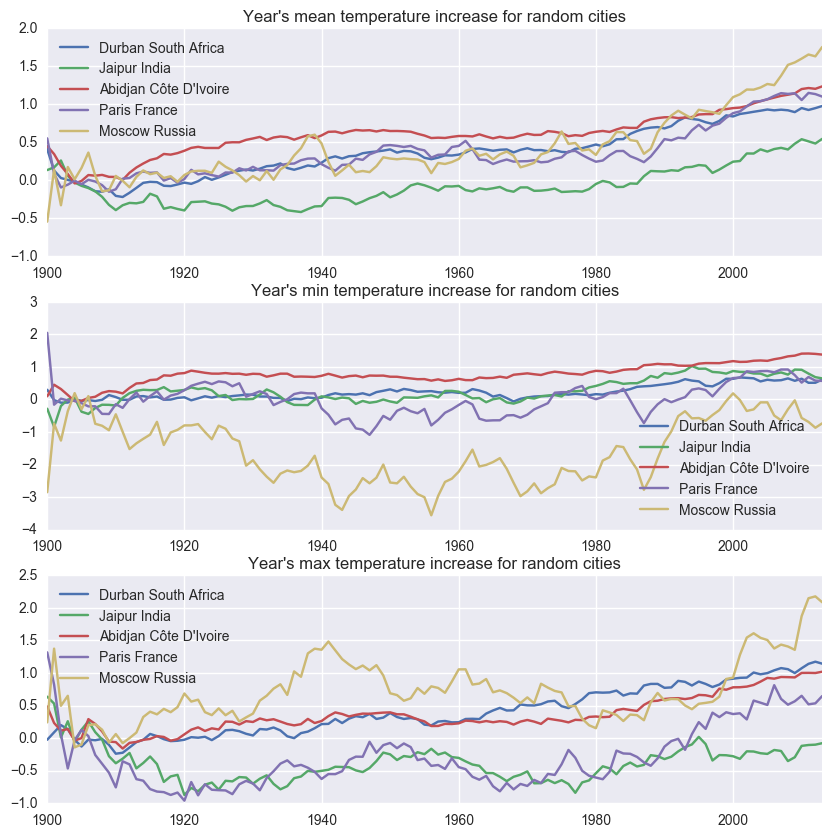

In [39]:
#to normalize cities temperatures we shift them by the mean temperature for the first 5 years
first_years_mean = city_means.iloc[:, :5].mean(axis=1) # mean temperature for the first 5 years
city_means_shifted = city_means.subtract(first_years_mean, axis=0)
def plot_temps(cities, city_ser, ax):
    first_years_mean = city_ser.iloc[:, :5].mean(axis=1)
    city_ser = city_ser.subtract(first_years_mean, axis=0)
    for city in random_cities:
        row = city_ser.loc[city]
        pd.stats.moments.ewma(row, 10).plot(label=row.name, ax=ax)
    ax.set_xlabel('')
    ax.legend(loc='best')
fig, axes = plt.subplots(3,1, figsize=(10,10))
n = 5
random_cities = city_means_shifted.sample(n).index
#plot the mean, min and max in the axis specified below
plot_temps(random_cities, city_means, axes[0])
plot_temps(random_cities, city_mins, axes[1])
plot_temps(random_cities, city_maxs, axes[2])
#set the title for each of the axis and also safe the plot as a pdf file
axes[0].set_title("Year's mean temperature increase for random cities")
axes[1].set_title("Year's min temperature increase for random cities")
axes[2].set_title("Year's max temperature increase for random cities")
plt.savefig("./ana_4/yrmeanminmaxrandomcities.png", bbox_inches='tight')